In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

seed = 42

In [4]:
train = pd.read_csv('data/data_train.csv')
test = pd.read_csv('data/data_test.csv')

X_train = train.drop('class', axis=1)
y_train = train['class']

X_test = test.drop('class', axis=1)
y_test = test['class']

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1, verbose=1)
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.7s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [10]:
random_forest_pred = random_forest.predict(X_test)

print('Accuracy:', accuracy_score(y_test, random_forest_pred))
print('Classification report:\n', classification_report(y_test, random_forest_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy: 0.9823483409674897
Classification report:
               precision    recall  f1-score   support

     Bengali       0.98      0.99      0.99      8164
    Gujarati       0.98      0.98      0.98      7868
       Hindi       0.99      0.99      0.99      7636
     Kannada       0.98      0.96      0.97      6488
   Malayalam       0.97      0.99      0.98      7200
     Marathi       0.99      0.98      0.98      7427
       Tamil       0.99      0.99      0.99      7258
      Telugu       0.97      0.95      0.96      1665

    accuracy                           0.98     53706
   macro avg       0.98      0.98      0.98     53706
weighted avg       0.98      0.98      0.98     53706



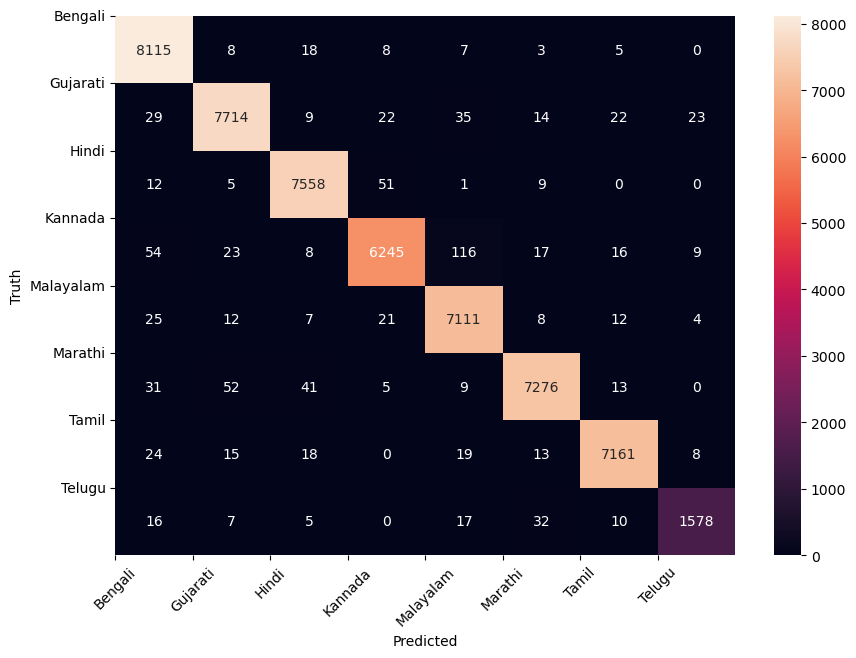

In [18]:
cm = confusion_matrix(y_test, random_forest_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Corrected xticks and yticks
class_labels = random_forest.classes_
tick_positions = np.arange(len(class_labels))  # Ensure matching lengths

plt.xticks(tick_positions, class_labels, rotation=45)
plt.yticks(tick_positions, class_labels, rotation=0)
plt.show()

In [24]:
import os
import pickle

# Create the 'models' directory if it does not exist
os.makedirs('models', exist_ok=True)

# Save the model
with open('models/random_forest.pkl', 'wb') as f:
    pickle.dump(random_forest, f)

print("Model saved successfully!")


Model saved successfully!
